# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df


# Criar variável binária para doença cardíaca (1 se num > 0, senão 0)
df['flag_doente'] = (df['num'] != 0).astype(int)

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [7]:
# Criar tabela bivariada para a variável sex
bivar_sex = df.groupby('sex')['flag_doente'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum(),
    total='count'
).reset_index()

# Calcular Odds, Odds Ratio, Logito e Weight of Evidence (WOE)
bivar_sex['odds'] = bivar_sex['doentes'] / bivar_sex['saudaveis']
total_odds = bivar_sex['odds'].sum()
bivar_sex['odds_ratio'] = bivar_sex['odds'] / total_odds
bivar_sex['log_odds'] = np.log(bivar_sex['odds'])
bivar_sex['woe'] = np.log(bivar_sex['odds_ratio'])

# Exibir a tabela no console
print("\n### Tabela Bivariada por Sexo ###")
print(bivar_sex)


### Tabela Bivariada por Sexo ###
   sex  saudaveis  doentes  total      odds  odds_ratio  log_odds       woe
0  0.0         72       25     97  0.347222    0.218881  -1.05779 -1.519228
1  1.0         92      114    206  1.239130    0.781119   0.21441 -0.247028


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [15]:
# Categorizar a variável age em 5 grupos
df['age_group'] = pd.qcut(df['age'], 5, labels=[1, 2, 3, 4, 5])

# Criar tabela bivariada para a variável age_group
bivar_age = df.groupby('age_group').agg(
    saudaveis=('flag_doente', lambda x: (x == 0).sum()),
    doentes=('flag_doente', lambda x: (x == 1).sum()),
    total=('flag_doente', 'count'),
    media_idade=('age', 'mean')
).reset_index()

# Calcular Odds, Odds Ratio, Logito e Weight of Evidence (WOE)
bivar_age['odds'] = bivar_age['doentes'] / bivar_age['saudaveis']
total_odds_age = bivar_age['odds'].sum()
bivar_age['odds_ratio'] = bivar_age['odds'] / total_odds_age
bivar_age['log_odds'] = np.log(bivar_age['odds'])
bivar_age['woe'] = np.log(bivar_age['odds_ratio'])

# Exibir a tabela no console
print("\n### Tabela Bivariada por Faixa Etária ###")
print(bivar_age)


### Tabela Bivariada por Faixa Etária ###
  age_group  saudaveis  doentes  total  media_idade      odds  odds_ratio  \
0         1         47       16     63    41.222222  0.340426    0.061399   
1         2         42       22     64    50.000000  0.523810    0.094473   
2         3         32       39     71    56.211268  1.218750    0.219811   
3         4         13       32     45    60.355556  2.461538    0.443959   
4         5         30       30     60    66.516667  1.000000    0.180358   

   log_odds       woe  
0 -1.077559 -2.790370  
1 -0.646627 -2.359438  
2  0.197826 -1.514985  
3  0.900787 -0.812024  
4  0.000000 -1.712811  


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

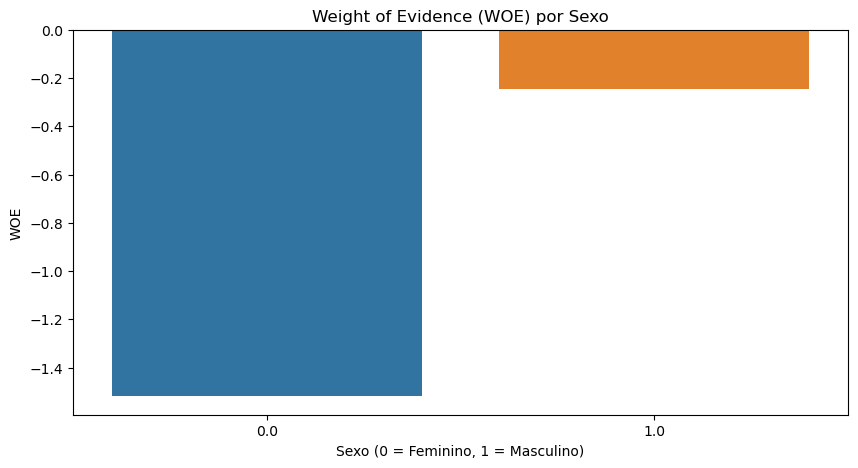

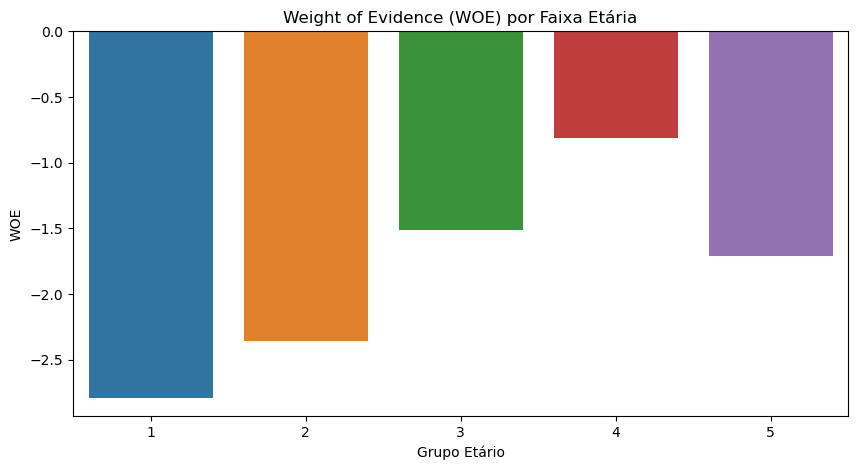

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico da bivariada para sexo
plt.figure(figsize=(10, 5))
sns.barplot(x=bivar_sex['sex'], y=bivar_sex['woe'])
plt.title("Weight of Evidence (WOE) por Sexo")
plt.xlabel("Sexo (0 = Feminino, 1 = Masculino)")
plt.ylabel("WOE")
plt.show()

# Gráfico da bivariada para faixa etária
plt.figure(figsize=(10, 5))
sns.barplot(x=bivar_age['age_group'].astype(str), y=bivar_age['woe'])
plt.title("Weight of Evidence (WOE) por Faixa Etária")
plt.xlabel("Grupo Etário")
plt.ylabel("WOE")
plt.show()